<a href="https://colab.research.google.com/github/AjayanN/forex_time_series_machine_learning/blob/master/first_proj_on_forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import numpy as np


In [0]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [0]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [0]:
import pandas as pd
import requests

# the data scraped from the fxtop site of nin max and avg of USD/EUR
page = requests.get("https://fxtop.com/en/historical-exchange-rates.php?A=1&C1=USD&C2=EUR&TR=1&MA=1&DD1=21&MM1=12&YYYY1=2009&B=1&P=&I=1&DD2=21&MM2=12&YYYY2=2019&btnOK=Go%21")
soup = BeautifulSoup(page.text,"html.parser")
x = soup.find_all('table')[-3]
l = []
for tr in x:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df = pd.DataFrame(l,columns = l[0]).drop(index = 0)
df.columns = ['Month(USD/EUR)','avg','min','max','no_of_workdays']



In [0]:
#conversion to datetime of the data
df['Month(USD/EUR)'] = df['Month(USD/EUR)'].str.split('/')
df['Month(USD/EUR)'] = df['Month(USD/EUR)'].str.join('-')
df['Month(USD/EUR)'] = pd.to_datetime(df["Month(USD/EUR)"])

In [114]:
df.columns

Index(['Month(USD/EUR)', 'avg', 'min', 'max', 'no_of_workdays'], dtype='object')

In [0]:
#changing the data types of the rows and dropping index = 121
df[['avg','min','max','no_of_workdays']] = df[['avg','min','max','no_of_workdays']].apply(pd.to_numeric)
df.dtypes
df = df.drop(index = 121)

In [116]:
#creating a new column to merge with the inflation rate dataframe
df['index1'] = df.index
df

,Month(USD/EUR),avg,min,max,no_of_workdays,index1
1,2019-12-01,0.900944,0.894935,0.907194,17,1
2,2019-11-01,0.904915,0.896218,0.910581,21,2
3,2019-10-01,0.904811,0.895015,0.917600,23,3
4,2019-09-01,0.908787,0.901226,0.918358,21,4
5,2019-08-01,0.898802,0.891107,0.906125,22,5
...,...,...,...,...,...,...
116,2010-05-01,0.796253,0.755401,0.818130,21,116
117,2010-04-01,0.746006,0.734484,0.755002,20,117
118,2010-03-01,0.737060,0.726480,0.749738,23,118
119,2010-02-01,0.730765,0.715103,0.741345,20,119


In [117]:
#getting the inflation rates of USD by scraping with pandas
data2 = pd.read_html("https://www.usinflationcalculator.com/inflation/current-inflation-rates/")[0]
data2 = data2.drop(index = [11,12,13,14,15,16,17,18,19,20])
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
1,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,NaN,NaN
2,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
3,2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
4,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
5,2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1
6,2014,1.6,1.1,1.5,2.0,2.1,2.1,2.0,1.7,1.7,1.7,1.3,0.8,1.6
7,2013,1.6,2.0,1.5,1.1,1.4,1.8,2.0,1.5,1.2,1.0,1.2,1.5,1.5
8,2012,2.9,2.9,2.7,2.3,1.7,1.7,1.4,1.7,2.0,2.2,1.8,1.7,2.1
9,2011,1.6,2.1,2.7,3.2,3.6,3.6,3.6,3.8,3.9,3.5,3.4,3.0,3.2


In [0]:
#deleting the index = 0 to remove year to Ave
array_conv_2 = np.array(data2)
array_conv_2 = np.delete(array_conv_2,(0),axis = 0)

In [119]:
#creating a clear dataframe (preparation for merging)
array_to_merge = array_conv_2.transpose()
years = array_to_merge[0]
array_to_merge = np.delete(array_to_merge,(0),axis = 0)
array_df = pd.DataFrame(array_to_merge, index = ['JAN',"FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","AVG"],columns=years)
array_df

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
JAN,1.6,2.1,2.5,1.4,-0.1,1.6,1.6,2.9,1.6,2.6
FEB,1.5,2.2,2.7,1.0,0.0,1.1,2.0,2.9,2.1,2.1
MAR,1.9,2.4,2.4,0.9,-0.1,1.5,1.5,2.7,2.7,2.3
APR,2.0,2.5,2.2,1.1,-0.2,2.0,1.1,2.3,3.2,2.2
MAY,1.8,2.8,1.9,1.0,0.0,2.1,1.4,1.7,3.6,2.0
JUN,1.6,2.9,1.6,1.0,0.1,2.1,1.8,1.7,3.6,1.1
JUL,1.8,2.9,1.7,0.8,0.2,2.0,2.0,1.4,3.6,1.2
AUG,1.7,2.7,1.9,1.1,0.2,1.7,1.5,1.7,3.8,1.1
SEP,1.7,2.3,2.2,1.5,0.0,1.7,1.2,2.0,3.9,1.1
OCT,1.8,2.5,2.0,1.6,0.2,1.7,1.0,2.2,3.5,1.2


In [120]:
#reversing the dataframe for converting from dec to jan
array_df = array_df.iloc[::-1]
array_df

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
AVG,NaN,2.4,2.1,1.3,0.1,1.6,1.5,2.1,3.2,1.6
DEC,NaN,1.9,2.1,2.1,0.7,0.8,1.5,1.7,3.0,1.5
NOV,2.1,2.2,2.2,1.7,0.5,1.3,1.2,1.8,3.4,1.1
OCT,1.8,2.5,2.0,1.6,0.2,1.7,1.0,2.2,3.5,1.2
SEP,1.7,2.3,2.2,1.5,0.0,1.7,1.2,2.0,3.9,1.1
AUG,1.7,2.7,1.9,1.1,0.2,1.7,1.5,1.7,3.8,1.1
JUL,1.8,2.9,1.7,0.8,0.2,2.0,2.0,1.4,3.6,1.2
JUN,1.6,2.9,1.6,1.0,0.1,2.1,1.8,1.7,3.6,1.1
MAY,1.8,2.8,1.9,1.0,0.0,2.1,1.4,1.7,3.6,2.0
APR,2.0,2.5,2.2,1.1,-0.2,2.0,1.1,2.3,3.2,2.2


In [0]:
# monthly variation in inflation for USD = -0.050
# monthly variation in inflation for EUR = -0.320
#dropping avg 
test_arr = array_df.drop(index='AVG')
test_arr = np.array(test_arr)

In [0]:
#transposing to get in the from dec,nov etc of 2019 then dec,nov etc of 2018 soon
test_arr = test_arr.transpose()

In [123]:
#reshaping the array to fot into the first df
array_df = pd.DataFrame(np.reshape(test_arr,(120,)),columns = ['inf_rate_USD'],index = [i for i in range(1,121)])
array_df.head()


,inf_rate_USD
1,NaN
2,2.1
3,1.8
4,1.7
5,1.7


In [128]:
#for merging creating a same column
array_df['index1'] = array_df.index
array_df

,inf_rate_USD,index1
1,NaN,1
2,2.1,2
3,1.8,3
4,1.7,4
5,1.7,5
...,...,...
116,2.0,116
117,2.2,117
118,2.3,118
119,2.1,119


In [0]:
assert len(df) == len(array_df)

In [129]:
#merging the dataframe
result = pd.merge(df, array_df,on=['index1'])
result = result.drop(columns = "index1")
result

,Month(USD/EUR),avg,min,max,no_of_workdays,inf_rate_USD
0,2019-12-01,0.900944,0.894935,0.907194,17,NaN
1,2019-11-01,0.904915,0.896218,0.910581,21,2.1
2,2019-10-01,0.904811,0.895015,0.917600,23,1.8
3,2019-09-01,0.908787,0.901226,0.918358,21,1.7
4,2019-08-01,0.898802,0.891107,0.906125,22,1.7
...,...,...,...,...,...,...
115,2010-05-01,0.796253,0.755401,0.818130,21,2.0
116,2010-04-01,0.746006,0.734484,0.755002,20,2.2
117,2010-03-01,0.737060,0.726480,0.749738,23,2.3
118,2010-02-01,0.730765,0.715103,0.741345,20,2.1


In [144]:
import math
#tuning the datatypesresult['inf_rate_USD'] = result['inf_rate_USD'].apply(pd.to_numeric)
result['inf_rate_USD'].fillna(result['inf_rate_USD'].mean(),inplace=True)
result['inf_rate_USD'] = result['inf_rate_USD'].apply(pd.to_numeric)
result.loc[0,'inf_rate_USD'] = 1.77 #mean of the inf_rate_USD and nearly -0.050
result.head(5)

,Month(USD/EUR),avg,min,max,no_of_workdays,inf_rate_USD
0,2019-12-01,0.900944,0.894935,0.907194,17,1.77
1,2019-11-01,0.904915,0.896218,0.910581,21,2.10
2,2019-10-01,0.904811,0.895015,0.917600,23,1.80
3,2019-09-01,0.908787,0.901226,0.918358,21,1.70
4,2019-08-01,0.898802,0.891107,0.906125,22,1.70


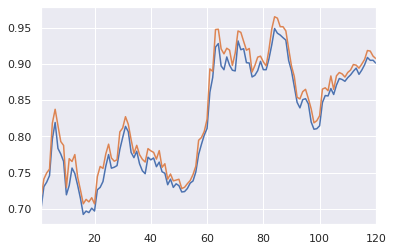

In [170]:
result_inv = result.iloc[::-1]
result_inv.index = [i for i in range(1,121)]
result_inv["avg"].plot()
result_inv["max"].plot()